<a href="https://colab.research.google.com/github/abdullahamruf/ChatApp/blob/main/heart_diseases_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
X_cat = df[['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking']]
X_num = df.drop(['anaemia','diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT'], axis=1)

In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [5]:
X_cat = pd.get_dummies(X_cat)

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns= X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y=df['DEATH_EVENT']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=500)
knn =  KNeighborsClassifier()
xgb =xgb.XGBClassifier(n_estimators=500,
        colsample_bytree=0.5,
        max_depth =10)


In [51]:
from sklearn.ensemble import StackingClassifier

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [53]:
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)

In [54]:
lr = LogisticRegression()
stack_model = StackingClassifier( estimators = clf,final_estimator = lr)


In [55]:
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=500)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.5,
                                              max_depth=10,
                                              n_estimators=500))],
                   final_estimator=LogisticRegression())

In [56]:
from sklearn.metrics import classification_report

In [57]:
pred1 = stack_model.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        64
           1       0.83      0.73      0.78        26

    accuracy                           0.88        90
   macro avg       0.86      0.83      0.85        90
weighted avg       0.88      0.88      0.88        90



In [58]:
stack_model.score(X_test,y_test)

0.8777777777777778

In [59]:
print('Precision: %.3f' % precision_score(y_test, pred1))

Precision: 0.826


In [60]:
print('Recall: %.3f' % recall_score(y_test, pred1))
print('F1 Score: %.3f' % f1_score(y_test, pred1))

Recall: 0.731
F1 Score: 0.776


In [61]:
print('Accuracy: %.3f' % accuracy_score(y_test, pred1))

Accuracy: 0.878


In [20]:
clf = [('lr',lr),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)

In [21]:
stack_model = StackingClassifier( estimators = clf,final_estimator = dtc)

In [22]:
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rfc',
                                RandomForestClassifier(n_estimators=500)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(colsample_bytree=0.5,
                                              max_depth=10,
                                              n_estimators=500))],
                   final_estimator=DecisionTreeClassifier())

In [23]:
pred = stack_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83        64
           1       0.57      0.62      0.59        26

    accuracy                           0.76        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.76      0.76      0.76        90



In [24]:
stack_model.score(X_test,y_test)

0.7555555555555555

In [25]:
from sklearn.ensemble import BaggingClassifier

In [26]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=500, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [27]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=0)

In [28]:
bag_model.oob_score_

0.8373205741626795

In [29]:
bag_model.score(X_test,y_test)

0.8444444444444444

In [30]:
pred = bag_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.75      0.69      0.72        26

    accuracy                           0.84        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90



In [31]:
bag_model = BaggingClassifier(
base_estimator=RandomForestClassifier(), 
n_estimators=500, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [32]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=0)

In [33]:
bag_model.score(X_test,y_test)

0.9

In [34]:
pred = bag_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        64
           1       0.95      0.69      0.80        26

    accuracy                           0.90        90
   macro avg       0.92      0.84      0.87        90
weighted avg       0.90      0.90      0.89        90



In [35]:
from sklearn.metrics import plot_roc_curve

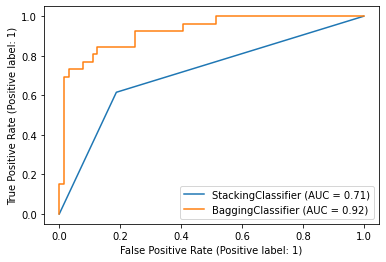

In [36]:
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(stack_model, X_test, y_test, ax=ax)
plot_roc_curve(bag_model, X_test, y_test, ax=ax)

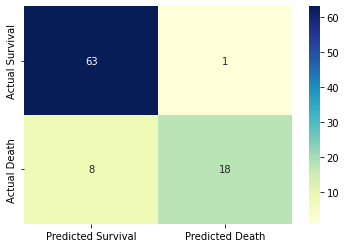

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Survival', 'Predicted Death'], index = ['Actual Survival', 'Actual Death'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

In [38]:
print('Precision: %.3f' % precision_score(y_test, pred))

Precision: 0.947


In [39]:
	
print('Recall: %.3f' % recall_score(y_test, pred))

Recall: 0.692


In [40]:
	
print('F1 Score: %.3f' % f1_score(y_test, pred))

F1 Score: 0.800


In [41]:
	
print('Accuracy: %.3f' % accuracy_score(y_test, pred))


Accuracy: 0.900
